# The Best Neighborhood in Pittsburgh

Our team decided that the best neighborhood had to allow you to be calm. In order to feel calm an individual has to feel safe and have positive visual stimuli. Residents that feel safe are able to have a better sense of community and belonging within a nieghborhood. Meanwhile, the presence of trees offers am aesthetic factor as well better air quality. 

![Lorax](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExcTloamI2OWhieDV3MzIxb3llY3BjMGtvNGVsZjRwYXFybXV6d3cyNyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/pcHPUCa4GeApO/giphy.gif)

In [1]:
import pandas as pd

## Metrics 

The metrics we decided on were the number of firearms, firearm siezures, and trees

#  First Data Set - Arrest Data

First, I imported pandas and loaded the data from the csv file and checked to make sure that it imported correctly.

In [17]:
#read the csv file and check it
import pandas as pd
arrests = pd.read_csv("arrest_data.csv")
arrests.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


<br/>
I turned the csv file into a dictionary where the keys were the neighborhoods, and the values were the amount of times a neighborhood showed up by iterating over the Incident Neighborhood column.

In [18]:
#count how many times each neighborhood appears using a dictionary
neighbor = dict()

for index, row in arrests.iterrows():
    item = row['INCIDENTNEIGHBORHOOD']
    
    if item not in neighbor:
        neighbor[item] = 1
    else:
        neighbor[item] = neighbor[item] + 1
        
print(neighbor)

{'Bloomfield': 984, 'Outside City': 316, 'Westwood': 226, 'East Allegheny': 2217, 'Crafton Heights': 601, 'Greenfield': 537, 'Brookline': 1390, 'Regent Square': 37, 'East Liberty': 1889, nan: 2489, 'East Hills': 1194, 'Carrick': 2352, 'Allegheny Center': 1244, 'South Side Flats': 3497, 'Sheraden': 1285, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 289, 'Perry South': 1057, 'Allentown': 947, 'North Shore': 814, 'Marshall-Shadeland': 1516, 'Central Oakland': 521, 'Middle Hill': 932, 'Strip District': 503, 'Lincoln-Lemington-Belmar': 1362, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 558, 'Homewood North': 1969, 'Northview Heights': 713, 'Brighton Heights': 1114, 'Hazelwood': 1396, 'Perry North': 587, 'Bedford Dwellings': 665, 'Elliott': 663, 'Beechview': 1201, 'Fineview': 796, 'Glen Hazel': 169, 'Spring Hill-City View': 711, 'Bluff': 1502, 'Manchester': 471, 'Homewood West': 764, 'Outside County': 57, 'Point Breeze': 301, 'Homewo

<br/>
This data is unsorted, so I wanted to turn the dictionary into something that would be easier to manipulate. I turned the dictionary into a data frame.

In [4]:
#Turn dictionary into a data frame
data = {
    "Neighborhood": neighbor.keys(),
    "Arrests": neighbor.values()
}
nbrs = pd.DataFrame(data)

print(nbrs) 

       Neighborhood  Arrests
0        Bloomfield      984
1      Outside City      316
2          Westwood      226
3    East Allegheny     2217
4   Crafton Heights      601
..              ...      ...
94        Ridgemont       37
95   Swisshelm Park       43
96             Hays      120
97   Chartiers City       46
98  Mt. Oliver Boro       18

[99 rows x 2 columns]


<br/>
To find out the neighborhood with the least amount of arrests, I need to sort the data, so I sorted the data frame by the number of arrests.

In [5]:
#Sort values
nbrs = nbrs.sort_values(by="Arrests")
print(nbrs)

                 Neighborhood  Arrests
83    Mt. Oliver Neighborhood        2
27     Troy Hill-Herrs Island        6
98            Mt. Oliver Boro       18
26          Central Northside       23
94                  Ridgemont       37
..                        ...      ...
3              East Allegheny     2217
11                    Carrick     2352
9                         NaN     2489
13           South Side Flats     3497
87  Central Business District     4440

[99 rows x 2 columns]


<br/>
Now, I would like to visualize the data with a (bad) bar graph.

<Axes: >

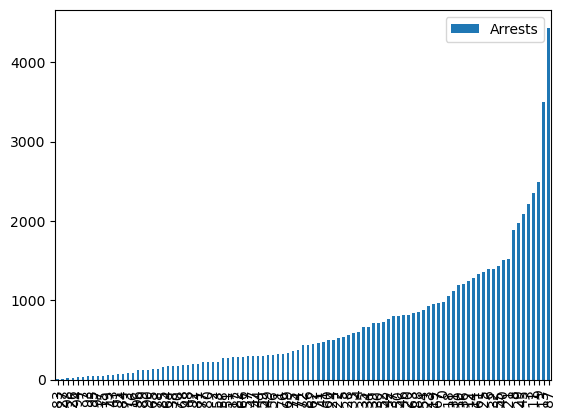

In [6]:
#plot data
nbrs.plot.bar()

<br/>
That is unreadable, but I don't need to know the arrests for every neighborhood. That is why we sorted the data, so I am only going to look at the 10 neighborhoods with the least amount of arrests.

<Axes: xlabel='Neighborhood', ylabel='Number of Arrests'>

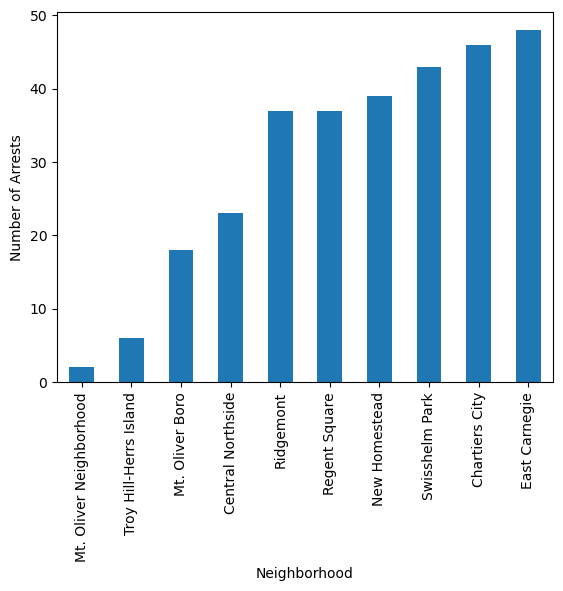

In [7]:
#plot better
nbrs[:10].plot.bar(x="Neighborhood", y="Arrests", ylabel="Number of Arrests", legend=False)

In [8]:
nbrs['Arrest_Score'] = 1 - (nbrs['Arrests']/nbrs['Arrests'].max())
top_10_safest = nbrs.sort_values(by='Arrest_Score', ascending = False).head(10)
print(top_10_safest)

               Neighborhood  Arrests  Arrest_Score
83  Mt. Oliver Neighborhood        2      0.999550
27   Troy Hill-Herrs Island        6      0.998649
98          Mt. Oliver Boro       18      0.995946
26        Central Northside       23      0.994820
94                Ridgemont       37      0.991667
7             Regent Square       37      0.991667
93            New Homestead       39      0.991216
95           Swisshelm Park       43      0.990315
97           Chartiers City       46      0.989640
15            East Carnegie       48      0.989189


# Second Data Set - Firearm Data

First, I imported pandas and loaded the data from the csv file and checked to make sure that it imported correctly.

In [9]:
#read the csv file and check it
import pandas as pd
firearms = pd.read_csv("gun_data.csv")
firearms.head()

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


<br/>
I turned the csv file into a dictionary where the keys were the neighborhoods, and the values were the amount of times a neighborhood showed up by iterating over the Incident Neighborhood column.

In [10]:
#count how many times each neighborhood appears using a dictionary
guns = dict()

for index, row in firearms.iterrows():
    item = row['neighborhood']
    
    if item not in guns:
        guns[item] = 1
    else:
        guns[item] = guns[item] + 1
        
print(guns)

{'Mount Oliver Borough': 7, 'Sheraden': 108, 'Terrace Village': 40, 'Brighton Heights': 82, nan: 781, 'Westwood': 10, 'East Liberty': 74, 'Upper Lawrenceville': 11, 'Marshall-Shadeland': 108, 'Beechview': 65, 'East Hills': 109, 'Arlington': 28, 'Arlington Heights': 8, 'Mount Washington': 78, 'South Side Flats': 180, 'Hazelwood': 112, 'Homewood South': 252, 'Greenfield': 22, 'Bloomfield': 38, 'Beltzhoover': 43, 'Homewood North': 130, 'Upper Hill': 28, 'Perry South': 112, 'Lincoln-Lemington-Belmar': 103, 'Bedford Dwellings': 69, 'Homewood West': 53, 'Carrick': 117, 'Central Northside': 59, 'Chateau': 22, 'Fineview': 62, 'Chartiers City': 4, 'Larimer': 107, 'Polish Hill': 10, 'South Shore': 12, 'Highland Park': 31, 'Knoxville': 96, 'Lower Lawrenceville': 13, 'Allentown': 67, 'Spring Hill-City View': 65, 'Garfield': 80, 'Bluff': 50, 'Overbrook': 25, 'South Side Slopes': 37, 'Central Business District': 112, 'Banksville': 10, 'Perry North': 33, 'Friendship': 3, 'Crawford-Roberts': 50, 'Midd

<br/>
This data is unsorted, so I wanted to turn the dictionary into something that would be easier to manipulate. I turned the dictionary into a data frame.

In [11]:
#Turn dictionary into a data frame
data = {
    "Neighborhood": guns.keys(),
    "Firearms": guns.values()
}
gn = pd.DataFrame(data)

print(gn) 

            Neighborhood  Firearms
0   Mount Oliver Borough         7
1               Sheraden       108
2        Terrace Village        40
3       Brighton Heights        82
4                    NaN       781
..                   ...       ...
84            Mt. Oliver         4
85              West End         6
86                Esplen         9
87                  Hays         7
88        Swisshelm Park         1

[89 rows x 2 columns]


<br/>
To find out the neighborhood with the least amount of arrests, I need to sort the data, so I sorted the data frame by the number of arrests.

In [12]:
#Sort values
gn = gn.sort_values(by="Firearms")
print(gn)

        Neighborhood  Firearms
88    Swisshelm Park         1
64       Summer Hill         2
46        Friendship         3
76     Regent Square         4
79           Oakwood         4
..               ...       ...
26           Carrick       117
20    Homewood North       130
14  South Side Flats       180
16    Homewood South       252
4                NaN       781

[89 rows x 2 columns]


<br/>
Now, I would like to visualize the data with a (bad) bar graph.

<Axes: >

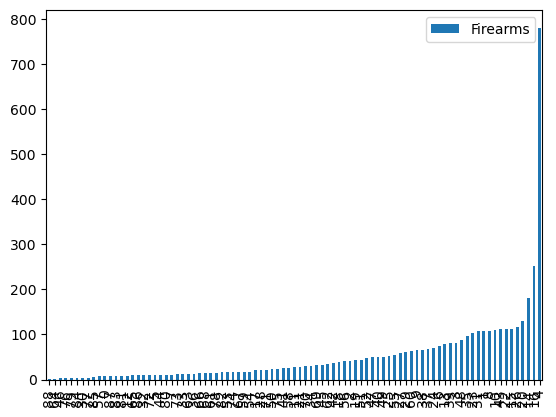

In [13]:
#plot data
gn.plot.bar()

<br/>
That is unreadable, but I don't need to know the arrests for every neighborhood. That is why we sorted the data, so I am only going to look at the 10 neighborhoods with the least amount of arrests.

<Axes: xlabel='Neighborhood', ylabel='Number of Firearm Seizures'>

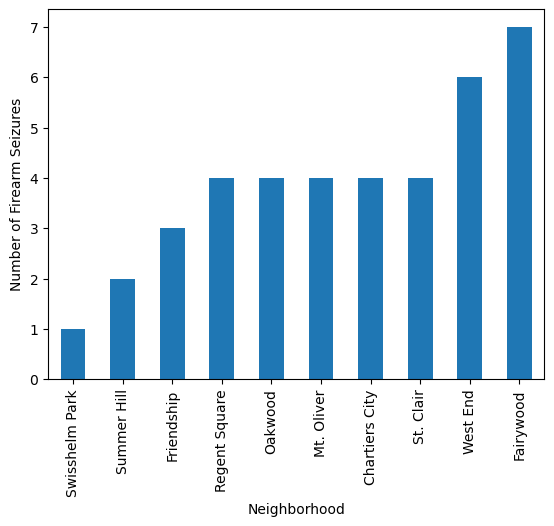

In [14]:
#plot better
gn[:10].plot.bar(x="Neighborhood", y="Firearms", ylabel="Number of Firearm Seizures", legend=False)

In [27]:
gn['Gun_Score'] = 1 - (gn['Firearms']/gn['Firearms'].max())
top_10_safest = gn.sort_values(by='Gun_Score', ascending = False).head(10)
print(top_10_safest)

      Neighborhood  Firearms  Gun_Score
88  Swisshelm Park         1   0.998720
64     Summer Hill         2   0.997439
46      Friendship         3   0.996159
79         Oakwood         4   0.994878
77       St. Clair         4   0.994878
84      Mt. Oliver         4   0.994878
30  Chartiers City         4   0.994878
76   Regent Square         4   0.994878
85        West End         6   0.992318
57       Fairywood         7   0.991037


# Third Data Set - Trees Data

In [20]:
import pandas as pd

trees = pd.read_csv("trees_data.csv")
trees.head()

/scratch/slurm-13250/ipykernel_84037/1971945974.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  trees = pd.read_csv("trees_data.csv")


,_id,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,754166088,7428.0,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,2,1946899269,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,3,1431517397,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,4,994063598,608.0,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,5,1591838573,1135.0,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


In [21]:
num_rows = len(trees)
print(f'There are {num_rows} trees in all of pittsburgh.')

There are 45709 trees in all of pittsburgh.


In [22]:
trees_counts = trees['neighborhood'].value_counts().sort_values(ascending=False).head(25)
print(trees_counts)

neighborhood
Squirrel Hill South          5073
Highland Park                2941
Squirrel Hill North          2083
South Side Flats             1693
Shadyside                    1558
Bloomfield                   1436
East Liberty                 1366
Point Breeze                 1316
Perry North                  1007
Central Business District    1002
Brighton Heights              910
Mount Washington              874
Allegheny Center              867
Brookline                     853
North Oakland                 775
Carrick                       772
Greenfield                    745
Central Lawrenceville         713
Manchester                    707
Stanton Heights               700
Central Northside             674
Hazelwood                     652
Garfield                      626
Beechview                     611
Crawford-Roberts              568
Name: count, dtype: int64


<Axes: xlabel='neighborhood'>

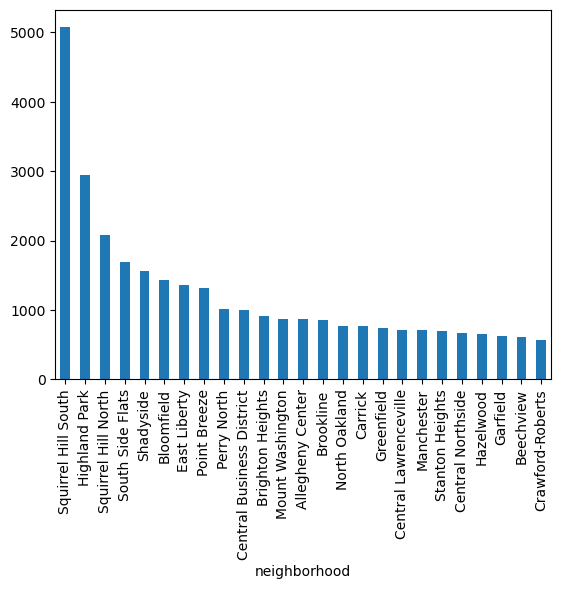

In [23]:
trees_counts.plot.bar()

In [24]:
Tree_Score = trees_counts/trees_counts.max()
top_tree_neighborhoods = trees.sort_values(by=Tree_Score, ascending = False).head(10)
print(top_tree_neighborhoods)

KeyError: neighborhood
Squirrel Hill South          1.000000
Highland Park                0.579736
Squirrel Hill North          0.410605
South Side Flats             0.333728
Shadyside                    0.307116
Bloomfield                   0.283067
East Liberty                 0.269269
Point Breeze                 0.259413
Perry North                  0.198502
Central Business District    0.197516
Brighton Heights             0.179381
Mount Washington             0.172285
Allegheny Center             0.170905
Brookline                    0.168145
North Oakland                0.152770
Carrick                      0.152178
Greenfield                   0.146856
Central Lawrenceville        0.140548
Manchester                   0.139365
Stanton Heights              0.137985
Central Northside            0.132860
Hazelwood                    0.128524
Garfield                     0.123398
Beechview                    0.120442
Crawford-Roberts             0.111965
Name: count, dtype: float64

## Conclusion

Normalized Data for Safety 

In [28]:
combined = pd.merge(nbrs[['Neighborhood', 'Arrest_Score']], 
                    gn[['Neighborhood', 'Gun_Score']], 
                    on='Neighborhood')
combined['Final_Safety_Score'] = (combined['Arrest_Score']+ combined['Gun_Score'])/2
top_10_final_safest = combined.sort_values(by='Final_Safety_Score', ascending=False).head(10)


print(top_10_final_safest)

      Neighborhood  Arrest_Score  Gun_Score  Final_Safety_Score
2   Swisshelm Park      0.990315   0.998720            0.994517
1    Regent Square      0.991667   0.994878            0.993273
3   Chartiers City      0.989640   0.994878            0.992259
4        St. Clair      0.987613   0.994878            0.991245
5      Summer Hill      0.982883   0.997439            0.990161
6          Oakwood      0.981532   0.994878            0.988205
7             Hays      0.972973   0.991037            0.982005
9        Fairywood      0.971396   0.991037            0.981217
8          Windgap      0.972072   0.985915            0.978994
14      Friendship      0.960811   0.996159            0.978485


## Of the top two, which has more trees?

In [33]:
neighborhood_name = 'Swisshelm Park'


count = (trees['neighborhood'] == neighborhood_name).sum()

print(f"There are {count} trees in {neighborhood_name}.")

There are 245 trees in Swisshelm Park.


In [34]:
neighborhood_name = 'Regent Square'


count = (trees['neighborhood'] == neighborhood_name).sum()

print(f"There are {count} trees in {neighborhood_name}.")

There are 434 trees in Regent Square.


# Regent Square is the best neighborhood